In [1]:
using DrWatson, Revise
@quickactivate "WiFi-Imager"
includet(srcdir("funcs.jl"))
using CairoMakie, Optimization, OptimizationOptimJL, LinearAlgebra, ThreadPinning, JLD2, ProgressMeter

In [2]:
includet(srcdir("makie_theme.jl"))

In [3]:
config_path = projectdir("config", "solid.jl")
includet(config_path)
@info "Config Load Finish!"

┌ Info: Config Load Finish!
└ @ Main /home/sf/code/WiFi-Imager/notebooks/born_with_data.ipynb:3


In [4]:
save_dir = datadir("som", "solid")
mkpath(save_dir)
data_folder = datadir("solid_jld")


parameters_all = map(
    frequency -> ConstantParameter(freq=frequency,
        doi_size_x=doi_size,
        doi_size_y=doi_size,
        grid_number_x=grid_number,
        grid_number_y=grid_number,
        txs_pos=Tx_pos,
        rxs_pos=Rx_pos),
    frequencies_all)

shared_variables_config = @strdict(parameters_all, L, config_path, selected_subcarriers, frequencies_all, Tx_pos, Rx_pos)
dict_res, _ = produce_or_load(shared_variables_for_save, shared_variables_config, save_dir)
@info "Shared Variables Load Finish!"

┌ Info: Shared Variables Load Finish!
└ @ Main /home/sf/code/WiFi-Imager/notebooks/born_with_data.ipynb:18


In [5]:
material_names, material_labels, rectangle_pos = read_label_xlsx(datadir("solid_res","坐标对应.xlsx"), all_materials_labels)

(Any["rectangle-1", "rectangle-2", "rectangle-3", "rectangle-4", "rectangle-5", "rectangle-6", "rectangle-7", "rectangle-8", "rectangle-9", "rectangle-10"  …  "leather-wood-glass-11", "leather-wood-glass-12", "leather-wood-glass-13", "leather-wood-glass-14", "leather-wood-glass-15", "leather-wood-glass-16", "leather-wood-glass-17", "leather-wood-glass-18", "leather-wood-glass-19", "leather-wood-glass-20"], Any[[2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0]  …  [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0], [4.0, 2.0, 3.0]], Any[[[0.0, 0.0, 0.0, 0.1, 0.05, 0.1, 0.05, 0.0]], [[0.2, 0.05, 0.2, 0.15, 0.25, 0.15, 0.25, 0.05]], [[-0.25, -0.2, -0.25, -0.15, -0.15, -0.15, -0.15, -0.2]], [[-0.3, 0.25, -0.3, 0.35, -0.25, 0.35, -0.25, 0.25]], [[0.15, 0.15, 0.15, 0.25, 0.2, 0.25, 0.2, 0.15]], [[0.2, -0.05, 0.2, 0.05, 0.25, 0.05, 0.25, -0.05]], [[-0.15, -0.35, -0.15, -0.25

In [6]:
# noting_csi_abs2_all = load(joinpath(data_folder, "noting_csi_abs2_all.jld2"), "noting_csi_abs2_all")
Ei_in_rxs_all = dict_res["Ei_in_rxs_all"]
Ei_in_domain_all = dict_res["Ei_in_domain_all"]
# gᵣgₜ2_all = [noting_csi_abs2_all[:, :, freq_index] ./ abs2.(Ei_in_rxs_all[freq_index]) for freq_index in 1:length(selected_subcarriers)]

5-element Vector{Matrix{ComplexF64}}:
 [-0.17549045138608255 + 0.820532454271623im -0.17549045138608255 + 0.820532454271623im 1.7573125725633552 - 0.9522913233396679im 1.7573125725633552 - 0.9522913233396679im; -0.5600529956327838 + 0.634337843557381im -0.8394227548663316 + 0.1647195504840915im 1.5378293893175665 + 1.4313887916284085im 1.354655829044384 - 1.4361731559678146im; … ; 1.5378293893175665 + 1.4313887916284085im 1.354655829044384 - 1.4361731559678146im -0.5600529956327838 + 0.634337843557381im -0.8394227548663316 + 0.1647195504840915im; 1.7573125725633552 - 0.9522913233396679im 1.7573125725633552 - 0.9522913233396679im -0.17549045138608843 + 0.8205324542716219im -0.17549045138608843 + 0.8205324542716219im]
 [-0.019584485104093143 + 0.8388604502442057im -0.019584485104093143 + 0.8388604502442057im 1.6770554931167427 - 1.087424073305448im 1.6770554931167427 - 1.087424073305448im; -0.4332422817749664 + 0.7268734298134056im -0.795185444069788 + 0.31534616097012586im 1.64053600354

In [7]:
file_index=150
temp_file_name = joinpath(data_folder, "$(material_names[file_index])_winsize=$(window_size)_samnum=$(sample_num).jld2")

"/home/sf/code/WiFi-Imager/data/solid_jld/glass-leather-3_winsize=200_samnum=5.jld2"

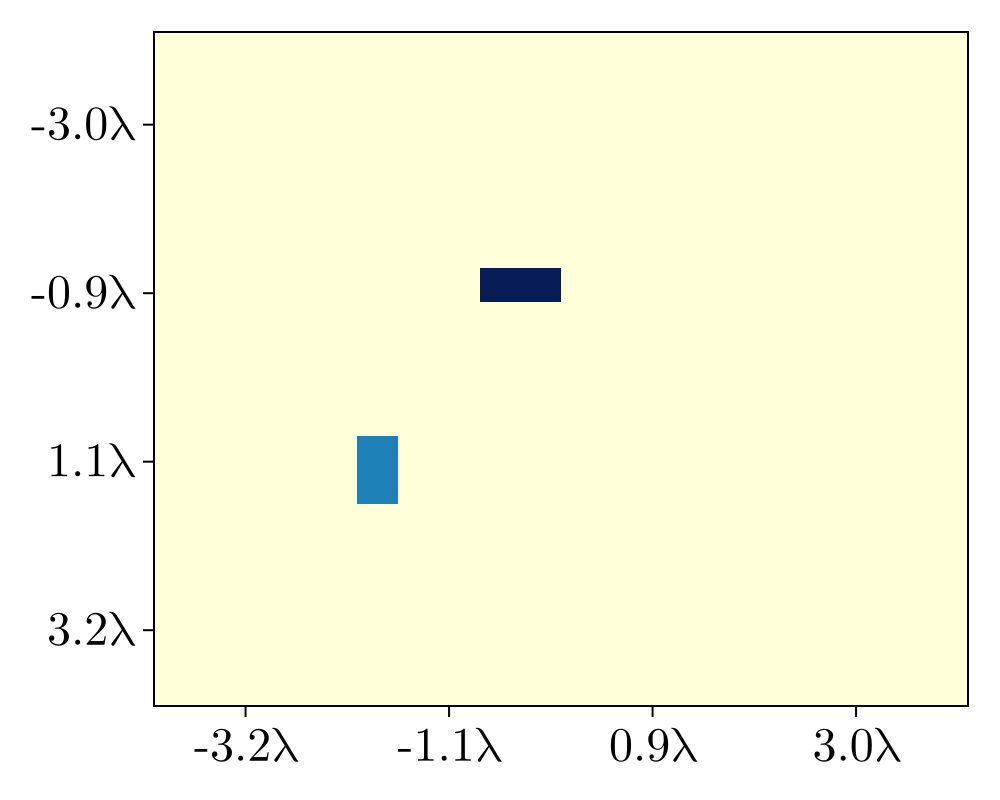

In [30]:

F_all, scatter, files_is_empty = load(temp_file_name, "F_all", "scatter", "files_is_empty")
let 
    fig = Figure(; size = (500, 400), rasterize=8)
    ax1 = Axis(fig[1, 1];xticks=(5:10:35,["$(round(parameters_all[1].grid_xs[i]/parameters_all[1].λ, digits=1))λ" for i in 5:10:35]),yticks=(5:10:35,["$(round(parameters_all[1].grid_ys[i]/parameters_all[1].λ, digits=1))λ" for i in 5:10:35]))
    heatmap!(ax1,abs.(scatter),colormap=:YlGnBu)
    save("/home/sf/paper/WiFimager/figures/born__phaseless_gt.pdf",fig)
    fig
end

In [16]:
sub_freq_ids = 1
sample_index = 1
F = F_all[files_is_empty.==false, :, sub_freq_ids, sample_index]
Ei_in_rxs = Ei_in_rxs_all[sub_freq_ids][files_is_empty.==false, :]
GS = dict_res["GS_all"][sub_freq_ids][files_is_empty.==false, :]
Ei_in_domain = Ei_in_domain_all[sub_freq_ids];

In [20]:
parameters = parameters_all[sub_freq_ids]
ξ_gt = (5 .- 1) .* (-1im * parameters.k₀ / parameters.η)

0.0 - 0.5438239951493377im

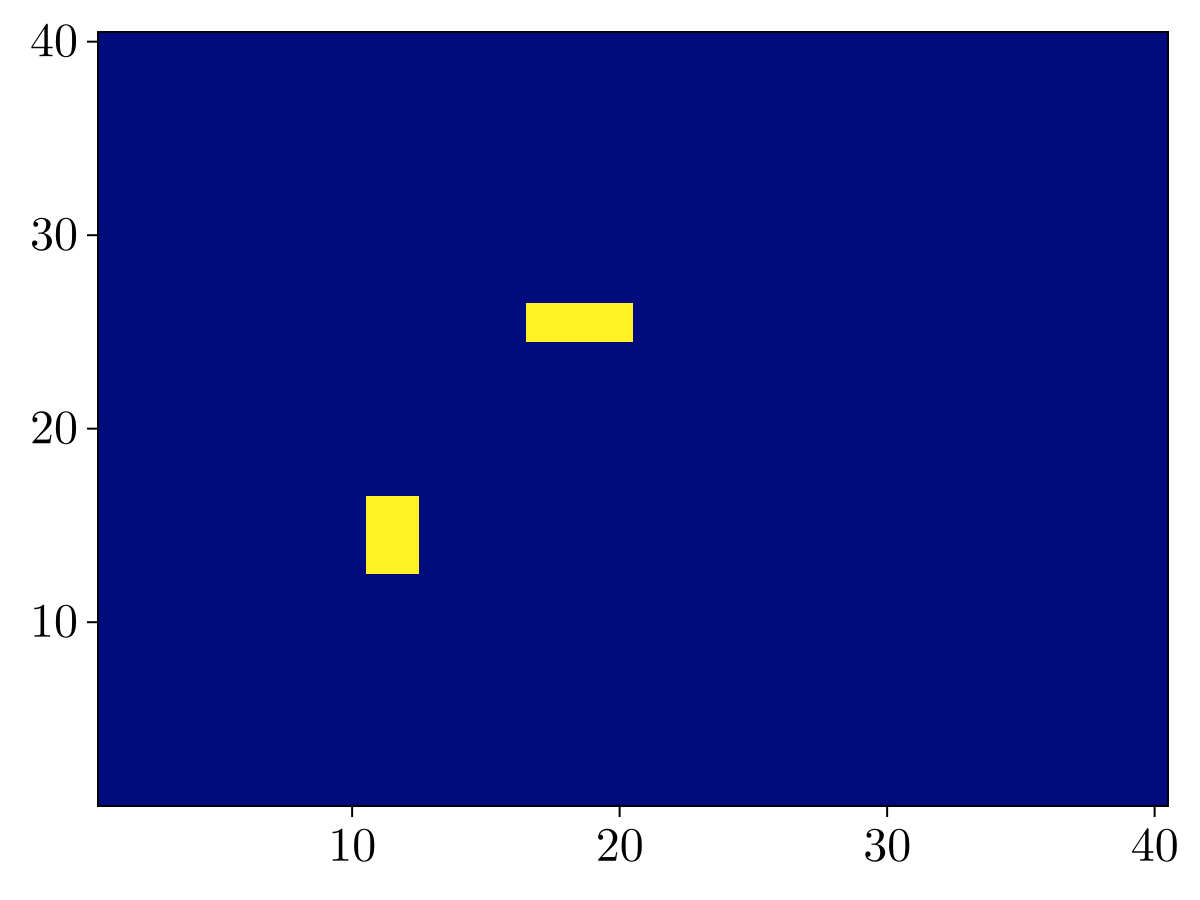

In [21]:
parameters = parameters_all[sub_freq_ids]
scatter_bce = zeros( size(scatter))
scatter_bce[scatter .!= 1] .= 1.0
heatmap(scatter_bce)

In [27]:
using Lux, Statistics
bce = BinaryCrossEntropyLoss()
α_phaseless = 0.02
rosenbrock_phaseless = (ξ, F) -> begin
        temp = abs2.(GS * Diagonal(ξ) * Ei_in_domain .+ Ei_in_rxs)
        ξ_pwr = abs2.(ξ)
        image = (ξ_pwr .- minimum(ξ_pwr)) ./ (maximum(ξ_pwr) - minimum(ξ_pwr))
        # return sum(abs2.(temp ./ mean(temp) - F ./ mean(F))) + α_phaseless * sum(abs2.(ξ))
        return sum(abs2.(temp ./ mean(temp) - F ./ mean(F))) + α_phaseless * bce(image,vec(scatter_bce))
    end

ξ₀ = 0 .- 0.6im .* rand(size(Ei_in_domain,1))
optf_phaseless = Optimization.OptimizationFunction(rosenbrock_phaseless, Optimization.AutoZygote())
prob_phaseless = Optimization.OptimizationProblem(optf_phaseless, ξ₀, F)
ξ_born_phaseless = reshape(Optimization.solve(prob_phaseless, LBFGS()).u, grid_number, grid_number);

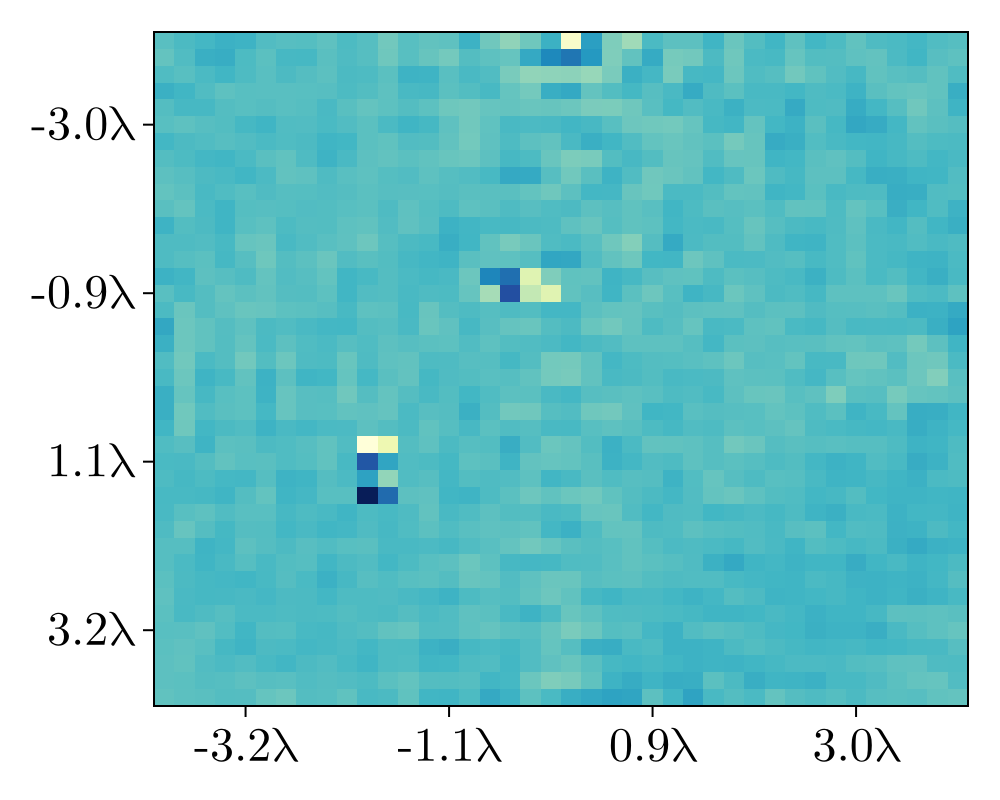

In [31]:
let 
    fig = Figure(; size = (500, 400), rasterize=8)
    ax1 = Axis(fig[1, 1];xticks=(5:10:35,["$(round(parameters_all[1].grid_xs[i]/parameters_all[1].λ, digits=1))λ" for i in 5:10:35]),yticks=(5:10:35,["$(round(parameters_all[1].grid_ys[i]/parameters_all[1].λ, digits=1))λ" for i in 5:10:35]))
    heatmap!(ax1,real.(ξ_born_phaseless ./ (-1im * parameters.k₀ / parameters.η)) .+ 1.0,colormap=:YlGnBu)
    save("/home/sf/paper/WiFimager/figures/born__phaseless_res.pdf",fig)
    fig
end
